#  Project Goal:
## The objective of this project is to predict the target variable (Y) using machine learning models.
###We will go through the complete ML pipeline:
#### 1) Exploratory Data Analysis (EDA)
#### 2) Data Cleaning & Preprocessing
#### 3) Model Training (Logistic Regression, Gradient Boosting, XGBoost)
#### 4) Model Evaluation & Comparison
#### 5) Key Insights & Conclusion


In [ ]:
# Mounting Google drive for easy access of dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all the useful Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
import lightgbm as lgb

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset
file = '/content/drive/MyDrive/default of credit card clients.xls'
df = pd.read_excel(file, header=1)

In [ ]:
# Performing EDA (Exploratory Data Analysis)
## Exploring basic information of our data
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print(df.head(5))

Shape of dataset: (30000, 25)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2       

In [ ]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
print(df.describe().T)



Summary Statistics:
                              count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       300

In [ ]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())
df.rename(columns={df.columns[-1]: 'Y'}, inplace=True)


Missing Values per Column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
# Data Cleaning for ML model fitting
if df.iloc[0]['Y'] == 'default payment next month':    # Drop the first row if it contains the header again
    df = df.drop(index=0).reset_index(drop=True)

df = df.drop_duplicates().reset_index(drop=True)       # Dropping duplicates
df = df.loc[:, df.notna().any()]                       # Dropping empty columns
df['Y'] = df['Y'].astype(int)                          # Ensuring whether all numeric columns are int/float
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]   # Dropping any unnamed columns


In [ ]:
# Setting seaborn style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Convert numeric-like object columns to float
numeric_cols = df.columns.drop('Y')  # Exclude target
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


/tmp/ipython-input-2177374879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Y', data=df, palette='Set2')


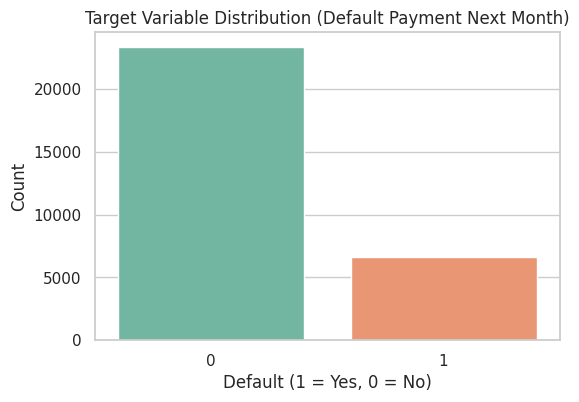

In [ ]:
# Distribution of Target Variable(Y) - Default Payment Next Month
plt.figure(figsize=(6,4))
sns.countplot(x='Y', data=df, palette='Set2')
plt.title("Target Variable Distribution (Default Payment Next Month)")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()
#Most customers did not default on their payment (majority class).
#Only about 20–23% of customers defaulted (minority class).
#The dataset is therefore imbalanced.

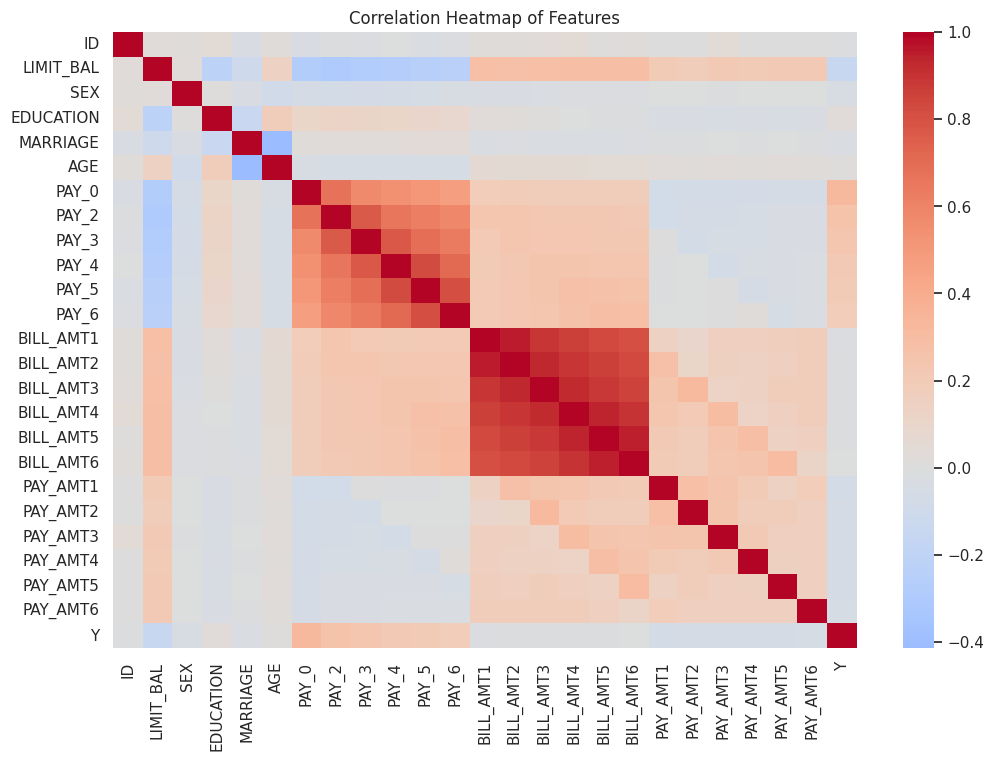

In [ ]:
# Correlation Heatmap of numeric features
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()
# Strong correlation among BILL_AMT and PAY_AMT features (expected pattern).
# PAY_0 to PAY_6 moderately correlated with each other.
# LIMIT_BAL shows weak negative correlation with default (Y).
# No single feature is highly correlated with Y → default depends on multiple factors.

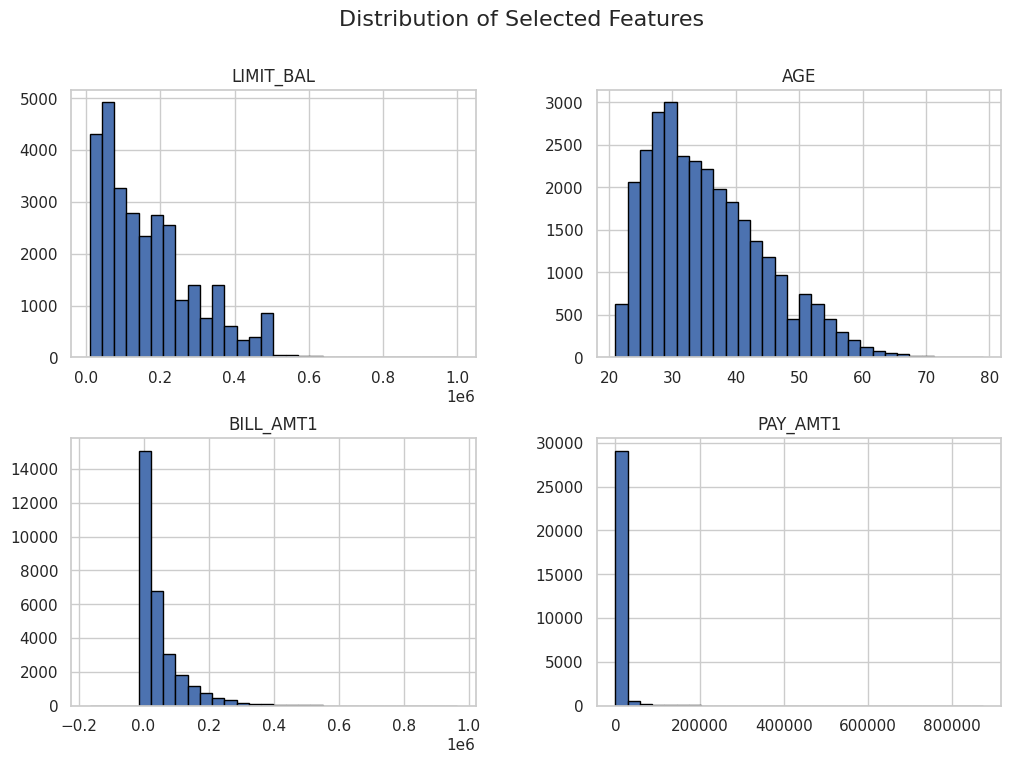

In [ ]:
# Distribution of few key features
num_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
df[num_features].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle("Distribution of Selected Features", fontsize=16)
plt.show()
# LIMIT_BAL: Right-skewed; most customers have lower credit limits.
# AGE: Concentrated between 25–40 years; fewer older customers.
# BILL_AMT1: Highly skewed; most bills are small, few very large.
# PAY_AMT1: Very right-skewed; majority of repayments are small, few extremely high.

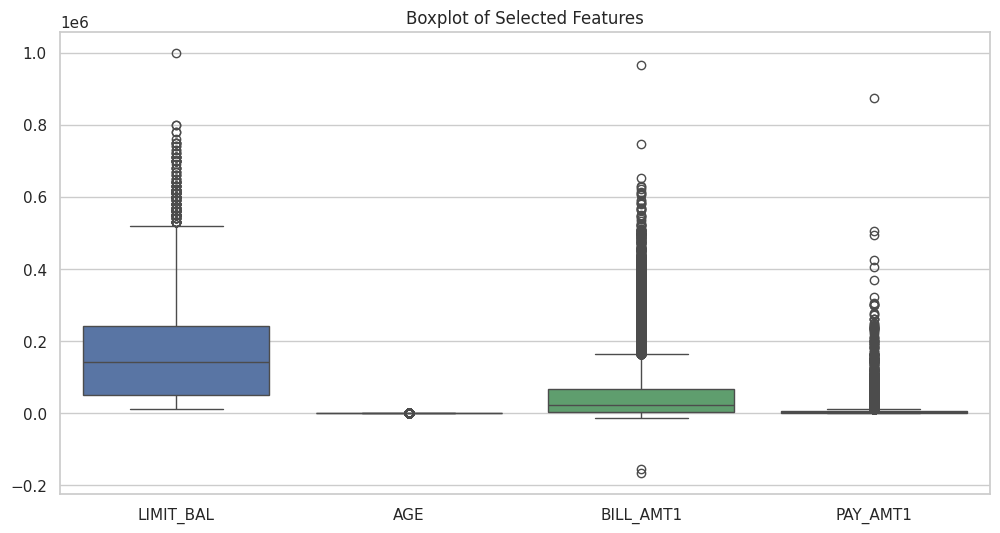

In [ ]:
# Checking for outliers using boxplots
selected_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[selected_features])
plt.title("Boxplot of Selected Features")
plt.show()
# LIMIT_BAL, BILL_AMT1, and PAY_AMT1 show high variance and many outliers (right-skewed).
# AGE is more normally distributed with fewer outliers.



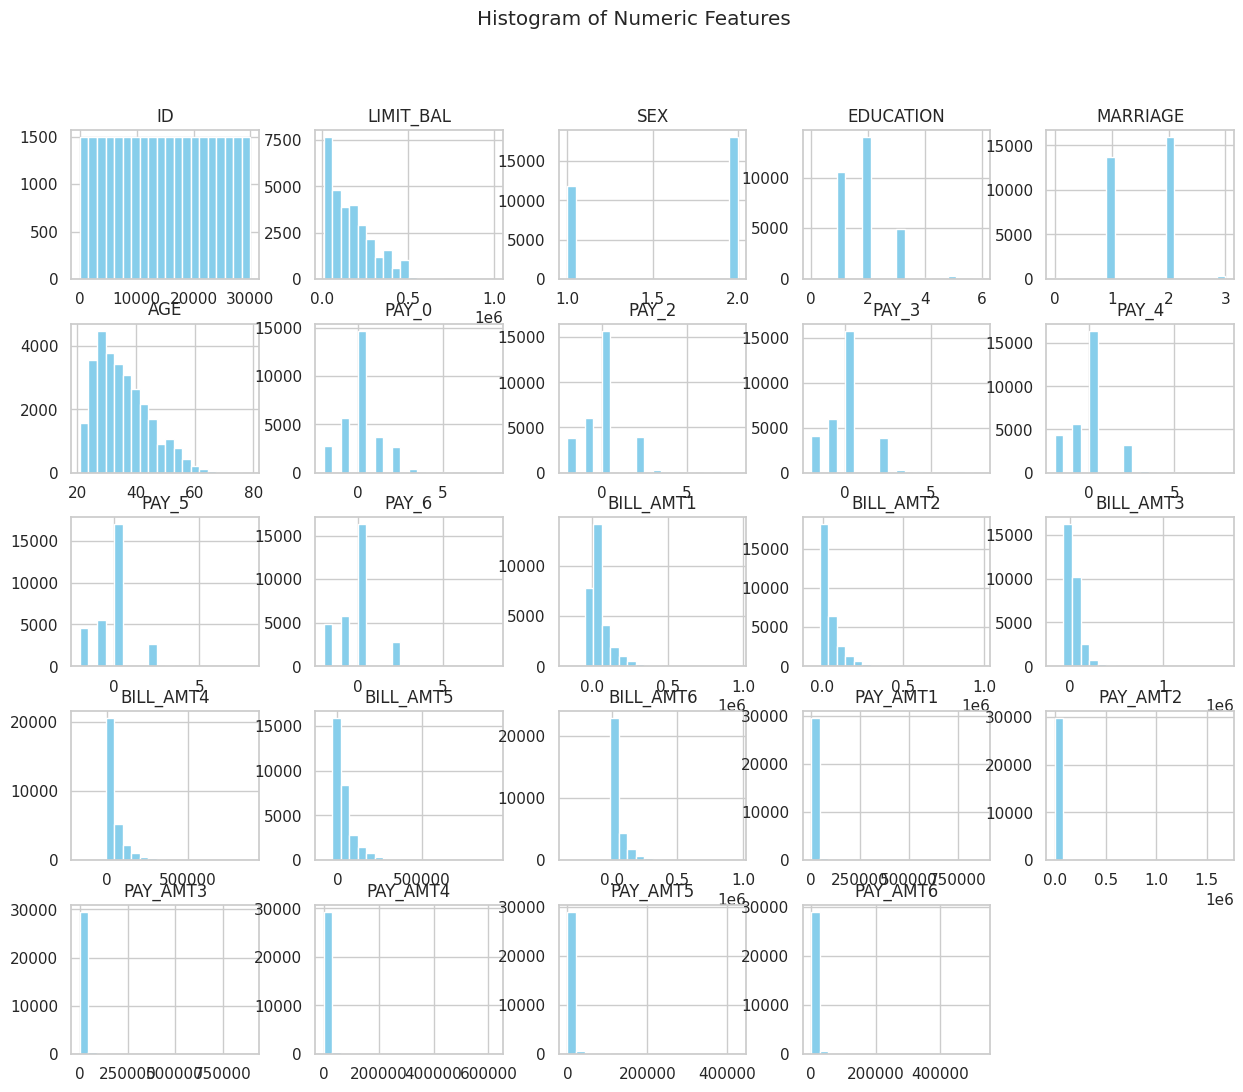

In [ ]:
# Histogram for features
numeric_features = df.select_dtypes(include=np.number).columns.drop('Y')
df[numeric_features].hist(bins=20, figsize=(15,12), color='skyblue')
plt.suptitle("Histogram of Numeric Features")
plt.show()

# LIMIT_BAL, BILL_AMTx, and PAY_AMTx are right-skewed → log scaling may help.
# Most customers are aged 30-40, and majority are in education level 1 or 2.
# PAY_0 to PAY_6 show most values around 0 or -1 → indicating timely or early payments.
# SEX and MARRIAGE features are imbalanced but interpretable.



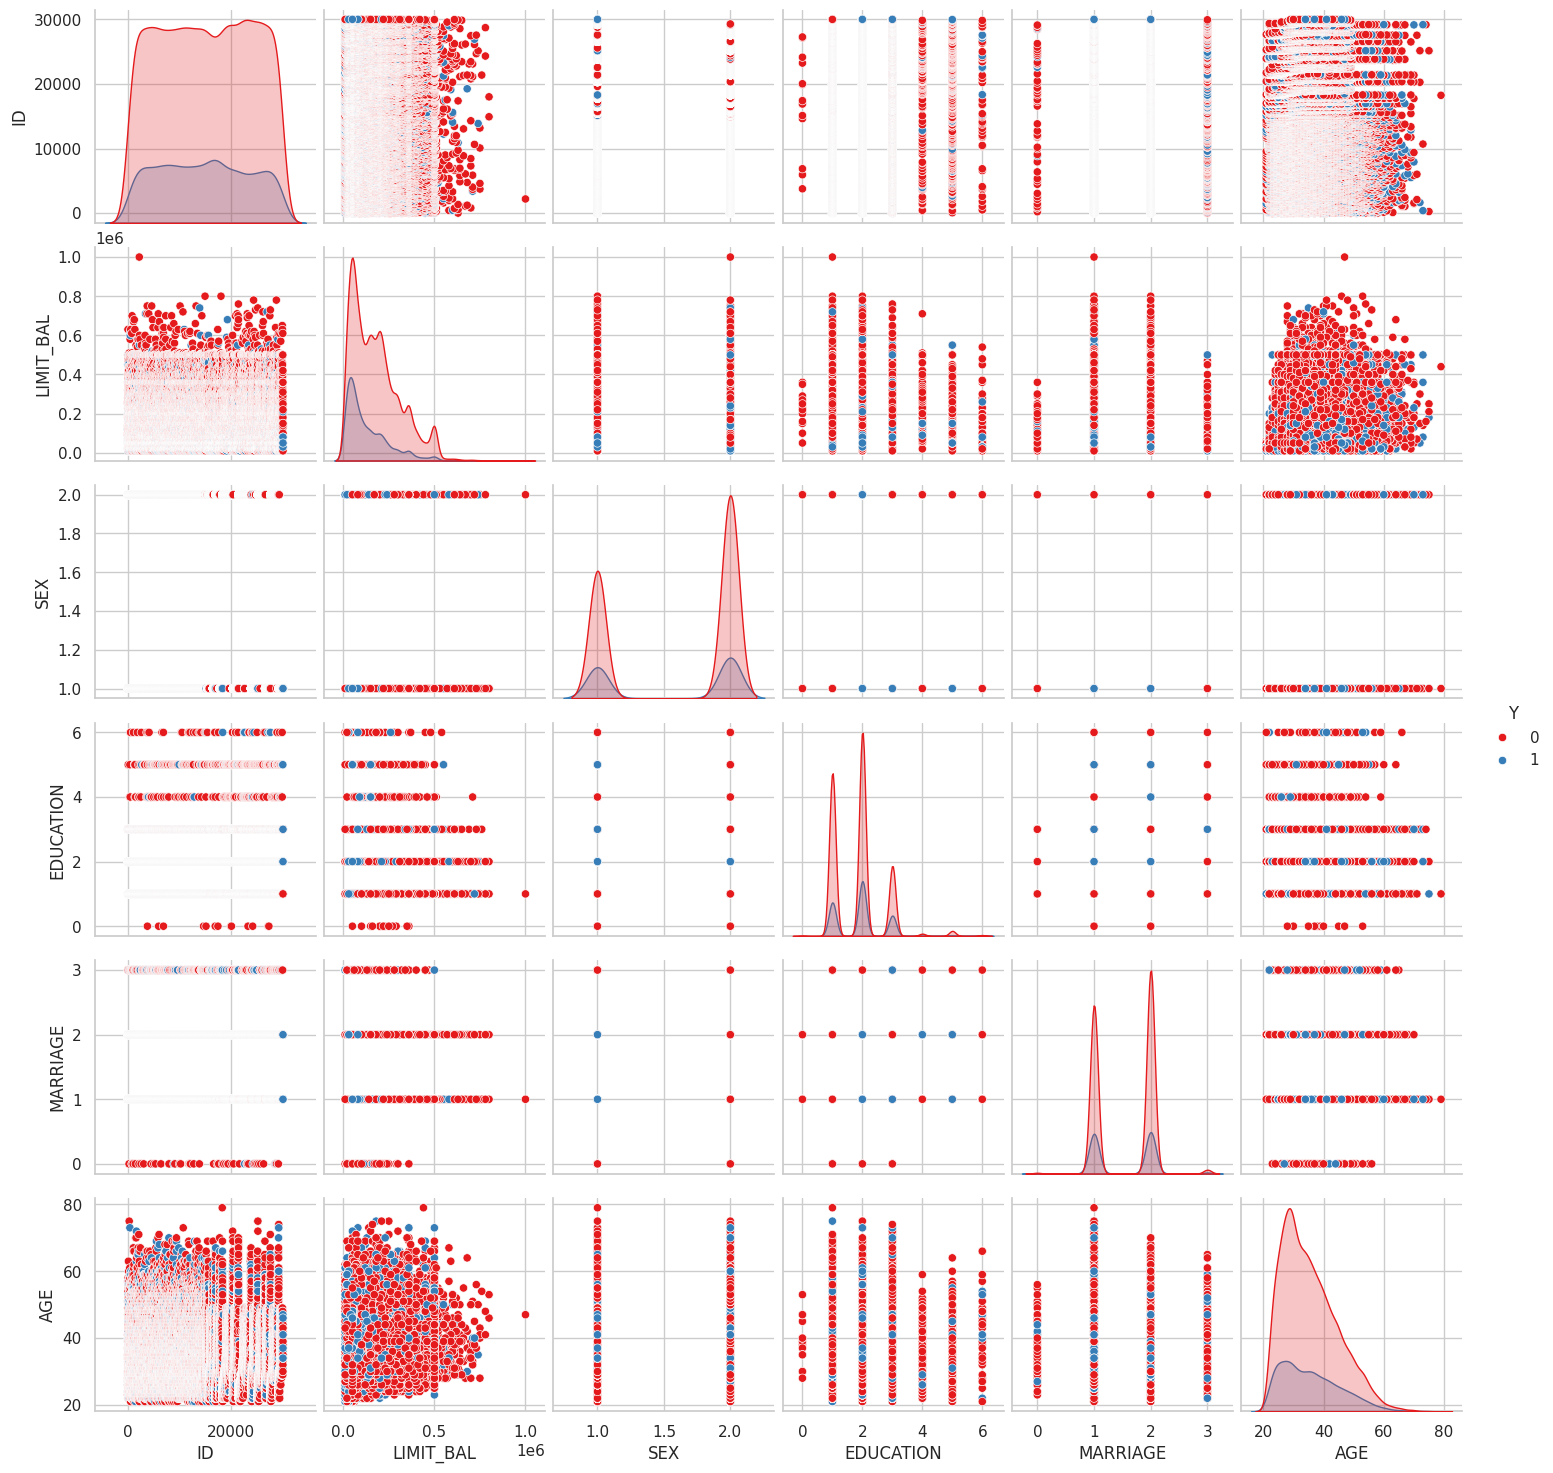

In [ ]:
top_features = numeric_features[:6]
pairplot_features = top_features.tolist() + ['Y']
pairplot_data = df[pairplot_features].dropna()
sns.pairplot(pairplot_data, hue='Y', palette='Set1')
plt.show()

In [ ]:
# Separating Target and Feature
X = df.drop(columns=['Y'])
y = df['Y']

In [ ]:
# Identifying Numeric and Categorical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Pre-processing
# Filling missing values
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [ ]:
# Spliting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Definig ML models by creating a dictionary of different classification models to compare their performance
# This setup allows us to easily loop through models for training, evaluation, and comparison.
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, n_jobs=-1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(32,16), max_iter=200, random_state=42)
}


In [ ]:
# Training the models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "F1-score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred)
    })

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:47:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
#  Compiling and Sorting Model Evaluation Results by creating a DataFrame containing metrics like ROC-AUC and Accuracy for each model.
# The DataFrame is sorted by ROC-AUC in descending order to easily identify the best-performing models.
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print(results_df)

                Model  Accuracy   ROC-AUC  F1-score  Precision
2             XGBoost  0.816500  0.780554  0.462665   0.656510
3            LightGBM  0.818167  0.777348  0.469100   0.662088
1        RandomForest  0.811167  0.766493  0.400846   0.671986
0  LogisticRegression  0.807333  0.701639  0.328688   0.716456
5                 MLP  0.771500  0.608443  0.163514   0.429487
4                 KNN  0.752167  0.606267  0.240939   0.373418




# Conclusion

#### XGBoost and LightGBM have the best overall performance in terms of Accuracy and ROC-AUC.
#### LightGBM slightly edges out XGBoost on F1-score and Precision, indicating better balance between precision and recall for positive class.
#### Random Forest performs decently but has lower F1-score, suggesting it may miss some positive cases.
#### Logistic Regression gives good accuracy but lower ROC-AUC and F1-score, showing it may not capture non-linear relationships well.
#### MLP and KNN perform poorly on this dataset, especially F1-score and Precision, indicating they are less suitable here.
#### Business takeaway: For predicting default payments, ensemble tree-based models like XGBoost and LightGBM are more reliable and would minimize financial risk by correctly identifying potential defaulters.


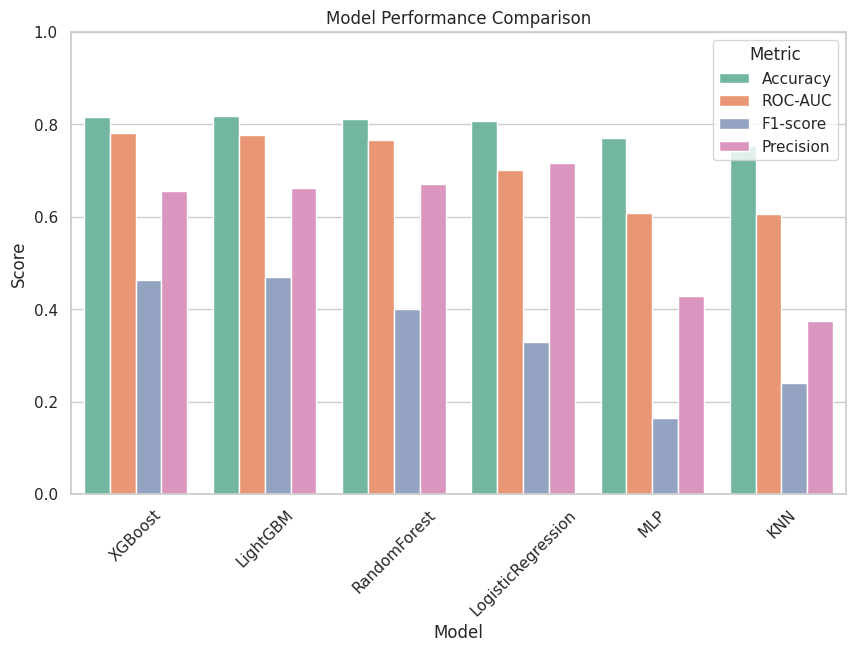

In [ ]:
# Visualizing Model Performance
results_long = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'ROC-AUC','F1-score','Precision'],
                               var_name='Metric', value_name='Score')
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long, palette='Set2')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


/tmp/ipython-input-1268167769.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='XGBoost Importance', y='Feature', data=xgb_features, palette='viridis')


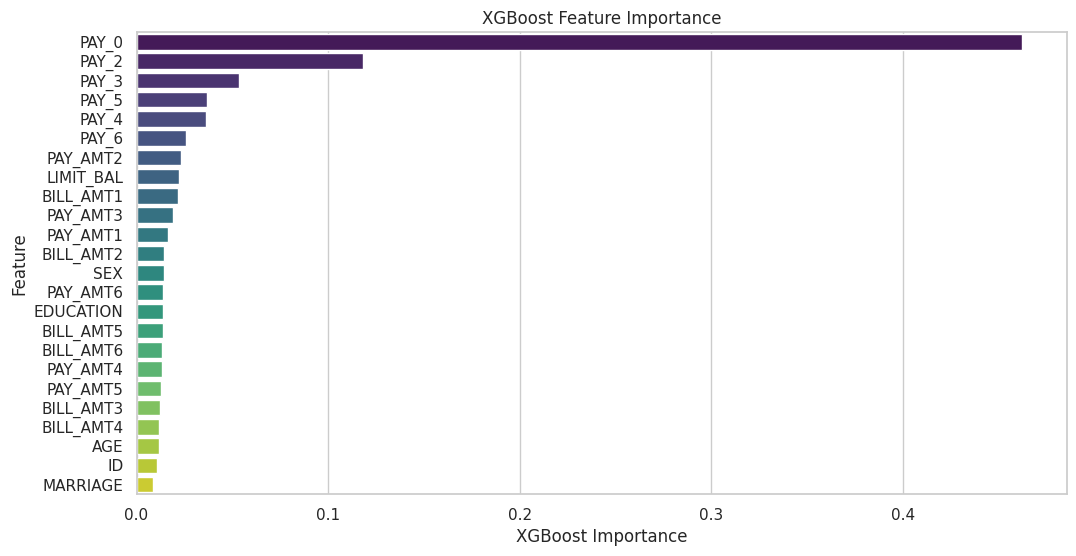

In [ ]:
# Feature importance for XGBoost model
xgb_importance = models['XGBoost'].feature_importances_
xgb_features = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost Importance': xgb_importance
}).sort_values(by='XGBoost Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='XGBoost Importance', y='Feature', data=xgb_features, palette='viridis')
plt.title("XGBoost Feature Importance")
plt.show()


/tmp/ipython-input-341435856.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lgb_importance, palette='viridis')


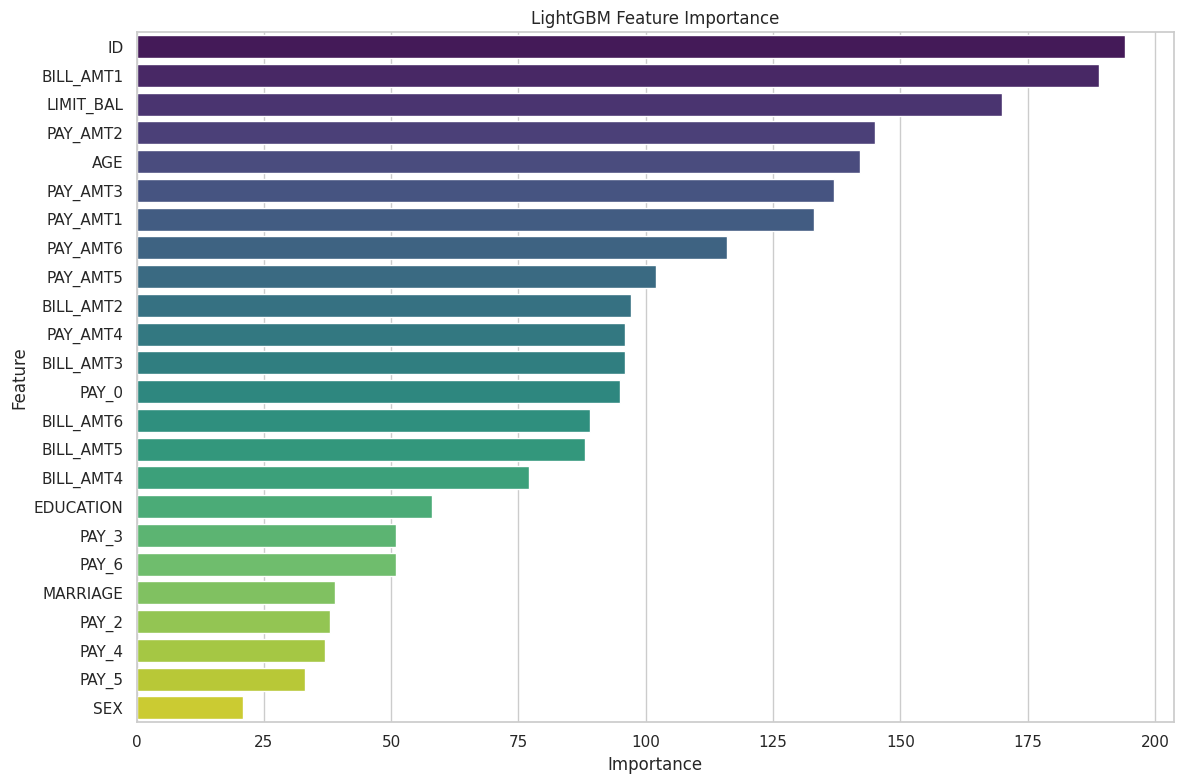

In [ ]:
# Feature importance for LightGBM
lgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgb_model.feature_importances_
})

lgb_importance = lgb_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=lgb_importance, palette='viridis')
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Key Insights & Business Takeaways
=================================

 Customer Risk Patterns:
- Features like credit limit, age, and repayment history (PAY_0, PAY_2…PAY_6) likely have high predictive importance.
- Customers with irregular repayment patterns or higher previous balances are more prone to default.
- Early identification allows banks/financial institutions to take proactive measures like personalized reminders, incentives for timely payment, or adjusted credit limits.

Business Implications:
- Using these ML models, credit risk can be monitored more effectively, reducing financial loss.
- Prioritizing high-risk customers for intervention can improve collection rates and customer satisfaction.
- Insights can also inform credit scoring policies and targeted marketing for low-risk customers.

 Recommended Model:
- XGBoost or LightGBM are ideal for deployment due to their high accuracy, fast training times, and ability to handle complex patterns in the data.
